In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

I use this mehtod to read the provied log files into pandas dataframe.
Observing the files beforehand, there is common pattern that I used to split and drop unnecessary colums.
Also, for new models the last line contains a single IOU for the whole model.
(To be honest I did not quite get the relationship between that number and the ones for each file, it was nor the mean neither the median or other significant statistics)

In [2]:
def readData(path, drop = False):
    df = pd.read_table(path, sep = " ", header = None)
    iou = None
    if(drop):
        iou = float(df.iloc[-1, 3])
        df = df.iloc[:-1, :]
    df.drop(df.columns[[0, 1, 3]], axis = 1, inplace = True)
    df.columns = ["file", "IOU"]
    return df, iou

Becasue of a comment for the previous task, this time I decided to read the path to the files using input. 
However, this is not the perfect way as well. A better way is to try to implement file chooser logic.

In [51]:
releasePath = input("Please, input the path to the data for the release model... ") #"Released_Score.log"
model1Path = input("Please, input the path to the data for the new model 1... ") #"Model1_Score.log"
model2Path = input("Please, input the path to the data for the new model 2... ") #"Model2_Score.log"
model3Path = input("Please, input the path to the data for the new model 3... ") # Model3_Score.log

Please, input the path to the data for the release model... Released_Score.log
Please, input the path to the data for the new model 1... Model1_Score.log
Please, input the path to the data for the new model 2... Model2_Score.log
Please, input the path to the data for the new model 3... Model3_Score.log


In [52]:
release, _ = readData(releasePath)

model1, model1_iou = readData(model1Path, drop = True) 
model2, model2_iou = readData(model2Path, drop = True) 
model3, model3_iou = readData(model3Path, drop = True) 

For each model, I get some descriptive statistics for it, e.g. min, max values, mean, variance.

In [49]:
print("Relese Model IOU summary:\n" + str(stats.describe(release["IOU"])))
print("Model 1 IOU summary:\n" + str(stats.describe(model1["IOU"])))
print("Model 2 IOU summary:\n" + str(stats.describe(model2["IOU"])))
print("Model 3 IOU summary:\n" + str(stats.describe(model3["IOU"])))

Relese Model IOU summary:
DescribeResult(nobs=101, minmax=(0.8562325279285271, 0.983667205940712), mean=0.9578848722793883, variance=0.0007997917864215826, skewness=-2.3079636673706116, kurtosis=5.042406969924022)
Model 1 IOU summary:
DescribeResult(nobs=101, minmax=(0.8608220846237672, 0.9834227342134434), mean=0.9543076375858066, variance=0.000580904729635559, skewness=-1.7365376825564158, kurtosis=3.448114455592939)
Model 2 IOU summary:
DescribeResult(nobs=101, minmax=(0.8444959719709987, 0.9821613293731098), mean=0.953571617051167, variance=0.000652980230826975, skewness=-1.7441702799811882, kurtosis=3.6434014643354296)
Model 3 IOU summary:
DescribeResult(nobs=101, minmax=(0.8359392703697824, 0.9837439569496172), mean=0.9521845779966908, variance=0.0007802280517230925, skewness=-1.6977423854667062, kurtosis=3.1470308191109364)


Next I tried to somehow visualize the evaluations first with boxplots, then with histograms

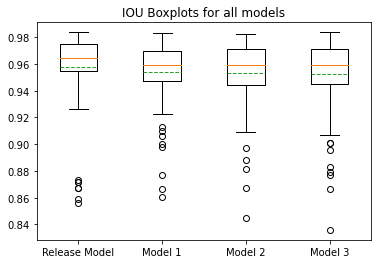

In [50]:
fig, ax = plt.subplots()
box = ax.boxplot([release["IOU"], model1["IOU"], model2["IOU"], model3["IOU"]], meanline = True, showmeans = True)
ax2 = ax.set_xticklabels(["Release Model", "Model 1", "Model 2", "Model 3"])
plt.title("IOU Boxplots for all models")
plt.show()

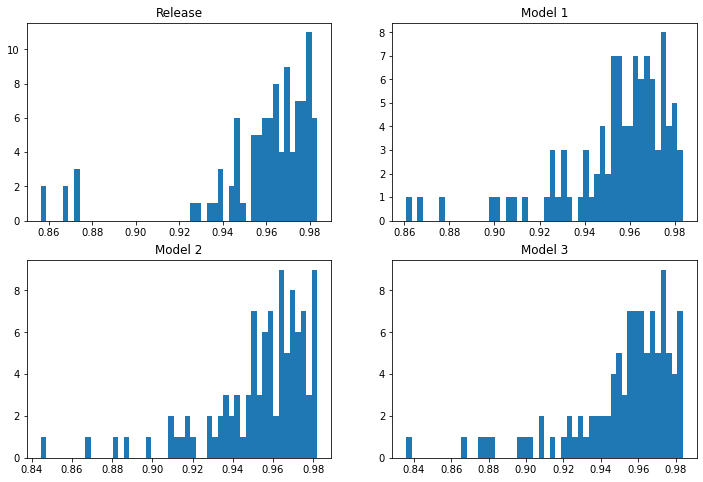

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax1.hist(release["IOU"], bins=50)
ax1.title.set_text("Release")

ax2.hist(model1["IOU"], bins=50)
ax2.title.set_text("Model 1")

ax3.hist(model2["IOU"], bins=50)
ax3.title.set_text("Model 2")

ax4.hist(model3["IOU"], bins=50)
ax4.title.set_text("Model 3")

plt.show()

As the task specifies, I need to decide whether there is a good candidate to be realesed and, if yes, which one it is. Given that all new 3 models consume significantly less resources but perform worse compared to the existing one, we should have a trade-off between the processing and quality. What refers to the quality, I have tried to compare evaluation metrics based on some statistics. The first and the simplest one was to compare their means. Although the differences between the means is of order 10^-3, the released model has the highest mean. Meanwhile model 1 has the highest mean among the new models. To continue, looking at the boxplots one can see that for all models the median IOU over the dataset is larger than the mean. This means that for all of them more than half of the evaluations are greater than the mean. But what to deduce from this? We can take into consideration also the first quartiles. The closer the mean to it, the more datapoints having larger IOU than mean. From this perspective, the released model again is the best. Among the new models, Model 1 and Model 3 have more or less the same distance between the mean and Q1. However, first quartile of Model 1 is large than that of Model 3. Next, we can look into the whiskers and the outliers. Despite having the most outliers, Model 1 seems to have the highest mean for the outliers as well. Also, it has the shortest whiskers among the new models(possibly meaning that the data is not as much spread as for the others). We can take a look at the histograms as well, though in this case they do not give as valuable info as boxplots. Finally, acknowledging the fact that most statistics is better in case Release Model compared to the Model 1, I would select Model 1 as the next release considering the fact that it uses significantly less resources and those statistical differences are not very significant. Of course the decision cannot be exact and depend only those two factors. I believe that, in general, the product, the sphere it is used highly affects the way decisions should be made. In particular, for features like audio/video segmentation often they are used real-time so better processing may be preferred over slightly higher quality. 